# Pandas教程

### 2018七月在线 机器学习集训营 julyedu.com
by 褚则伟 zeweichu@gmail.com

pandas是一个专门用于数据分析的python library

## [Pandas](http://pandas.pydata.org/)简介
- python数据分析library
- 基于numpy (对ndarray的操作)
- 有一种用python做Excel/SQL/R的感觉
- 为什么要学习pandas?
- pandas和机器学习的关系，数据预处理，feature engineering。

## 目录
- Series
- DataFrame
- Index
- 文件读写

## 数据结构Series

### 2018七月在线 机器学习集训营 julyedu.com

### 构造和初始化Series

In [1]:
# pip install pandas
import pandas as pd
import numpy as np

Series是一个一维的数据结构，下面是一些初始化Series的方法。

In [2]:
s = pd.Series([7, 'Beijing', 2.17, -12344, "Happy Birthday!"])
s

0                  7
1            Beijing
2               2.17
3             -12344
4    Happy Birthday!
dtype: object

In [4]:
s = pd.Series([1,2,3,4,5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
type(s)

pandas.core.series.Series

pandas会默认用0到n-1来作为Series的index，但是我们也可以自己指定index。index我们可以把它理解为dict里面的key。

In [10]:
s = pd.Series([7, 'Beijing', 2.17, -12344, "Happy Birthday!"],
             index = ['A', 'B', 'C', 'D', 'E'])
s

A                  7
B            Beijing
C               2.17
D             -12344
E    Happy Birthday!
dtype: object

还可以用dictionary来构造一个Series，因为Series本来就是key value pairs。

In [26]:
cities = {'Beijing': 55000, 
          'Shanghai': 60000, 
          'Shenzhen': 50000, 
          'Hangzhou': 20000, 
          'Guangzhou': 25000, 
          'Suzhou': None,
         }
apts = pd.Series(cities)
apts#not a number

Beijing      55000.0
Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Suzhou           NaN
dtype: float64

numpy ndarray构建一个Series

In [14]:
pd.Series(np.random.randn(5), 
         index = ['A', 'B', 'C', 'D', 'E'])

A   -0.213570
B    0.507175
C    0.120128
D    0.313199
E    0.340222
dtype: float64

In [15]:
np.arange(0, 6)

array([0, 1, 2, 3, 4, 5])

In [17]:
np.arange(0,6).reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])

### 选择数据

我们可以像对待一个list一样对待Series

In [25]:
apts[[1,3,5]]

Guangzhou    25000.0
Shanghai     60000.0
Suzhou           NaN
dtype: float64

In [27]:
apts[1:]

Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Suzhou           NaN
dtype: float64

In [28]:
apts[:-1]

Beijing      55000.0
Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
dtype: float64

为什么下面这样会拿到两个NaN呢？

In [45]:
apts[1:].add(apts[:-1], fill_value=0)

Beijing       55000.0
Guangzhou     50000.0
Hangzhou      40000.0
Shanghai     120000.0
Shenzhen     100000.0
Suzhou            NaN
dtype: float64

Series就像一个dict，前面定义的index就是用来选择数据的

In [31]:
apts["Hangzhou"]

20000.0

In [32]:
apts[["Hangzhou", "Suzhou", "Shanghai"]]

Hangzhou    20000.0
Suzhou          NaN
Shanghai    60000.0
dtype: float64

In [33]:
"Hangzhou" in apts

True

In [34]:
"Chongqing" in apts

False

In [36]:
# apts["Chongqing"]

比较安全的用key读取value的方法如下

In [37]:
apts.get("Chongqing", 0)

0

下面这种写法，如果key不存在，就可能会报错了

boolean indexing，与numpy类似。

In [38]:
apts < 50000

Beijing      False
Guangzhou     True
Hangzhou      True
Shanghai     False
Shenzhen     False
Suzhou       False
dtype: bool

In [39]:
apts[apts < 50000]

Guangzhou    25000.0
Hangzhou     20000.0
dtype: float64

In [41]:
apts.mean()

42000.0

In [42]:
apts[apts>apts.mean()]

Beijing     55000.0
Shanghai    60000.0
Shenzhen    50000.0
dtype: float64

下面我再详细展示一下这个boolean indexing是如何工作的

### Series元素赋值

Series的元素可以被赋值

In [47]:
print("Old value: ", apts["Shenzhen"])
apts["Shenzhen"] = 55000
print("New value: ", apts["Shenzhen"])

Old value:  50000.0
New value:  55000.0


In [48]:
apts

Beijing      55000.0
Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           NaN
dtype: float64

前面讲过的boolean indexing在赋值的时候也可以用

In [50]:
apts[apts<50000] = 40000
apts

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           NaN
dtype: float64

### 数学运算

下面我们来讲一些基本的数学运算。

In [52]:
apts / 2

Beijing      27500.0
Guangzhou    20000.0
Hangzhou     20000.0
Shanghai     30000.0
Shenzhen     27500.0
Suzhou           NaN
dtype: float64

In [53]:
apts * 2

Beijing      110000.0
Guangzhou     80000.0
Hangzhou      80000.0
Shanghai     120000.0
Shenzhen     110000.0
Suzhou            NaN
dtype: float64

In [54]:
apts ** 2

Beijing      3.025000e+09
Guangzhou    1.600000e+09
Hangzhou     1.600000e+09
Shanghai     3.600000e+09
Shenzhen     3.025000e+09
Suzhou                NaN
dtype: float64

numpy的运算可以被运用到pandas上去

In [55]:
np.sqrt(apts)

Beijing      234.520788
Guangzhou    200.000000
Hangzhou     200.000000
Shanghai     244.948974
Shenzhen     234.520788
Suzhou              NaN
dtype: float64

我们再定义一个新的Series做加法

In [56]:
cars = pd.Series({'Beijing': 300000, 'Shanghai': 400000, 'Shenzhen': 300000, \
                      'Tianjin': 200000, 'Guangzhou': 200000, 'Chongqing': 150000})
cars

Beijing      300000
Chongqing    150000
Guangzhou    200000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
dtype: int64

In [67]:
(apts * 100).add(cars).fillna(0)

Beijing      5800000.0
Chongqing          0.0
Guangzhou    4200000.0
Hangzhou           0.0
Shanghai     6400000.0
Shenzhen     5800000.0
Suzhou             0.0
Tianjin            0.0
dtype: float64

### 数据缺失

[reference](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [64]:
"Hangzhou" in apts

True

In [65]:
"Hangzhou" in cars

False

In [66]:
apts.isnull()

Beijing      False
Guangzhou    False
Hangzhou     False
Shanghai     False
Shenzhen     False
Suzhou        True
dtype: bool

In [68]:
apts.notnull()

Beijing       True
Guangzhou     True
Hangzhou      True
Shanghai      True
Shenzhen      True
Suzhou       False
dtype: bool

In [69]:
apts[apts.notnull()]

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
dtype: float64

In [73]:
apts = apts.fillna(0)

In [74]:
apts

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           0.0
dtype: float64

In [75]:
apts["Hangzhou"] = 20000

In [76]:
apts + cars

Beijing      355000.0
Chongqing         NaN
Guangzhou    240000.0
Hangzhou          NaN
Shanghai     460000.0
Shenzhen     355000.0
Suzhou            NaN
Tianjin           NaN
dtype: float64

In [78]:
cars["Beijing"] = np.nan

In [80]:
cars.fillna(0, inplace=True)

In [81]:
cars

Beijing           0.0
Chongqing    150000.0
Guangzhou    200000.0
Shanghai     400000.0
Shenzhen     300000.0
Tianjin      200000.0
dtype: float64

## 数据结构[Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### 七月在线 julyedu.com

一个Dataframe就是一张表格，Series表示的是一维数组，Dataframe则是一个二维数组，可以类比成一张excel的spreadsheet。也可以把Dataframe当做一组Series的集合。

### 创建一个DataFrame

dataframe可以由一个dictionary构造得到。

In [82]:
data = {'city': ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou', 'Chongqing'],
       'year': [2016,2017,2016,2017,2016, 2016],
       'population': [2100, 2300, 1000, 700, 500, 500]}
pd.DataFrame(data)

,city,population,year
0,Beijing,2100,2016
1,Shanghai,2300,2017
2,Guangzhou,1000,2016
3,Shenzhen,700,2017
4,Hangzhou,500,2016
5,Chongqing,500,2016


columns的名字和顺序可以指定

In [83]:
pd.DataFrame(data, columns = ['year', 'city', 'population'])

,year,city,population
0,2016,Beijing,2100
1,2017,Shanghai,2300
2,2016,Guangzhou,1000
3,2017,Shenzhen,700
4,2016,Hangzhou,500
5,2016,Chongqing,500


In [86]:
pd.DataFrame(data, columns = ['year', 'city', 'population'],
            index = ['one', 'two', 'three', 'four', 'five', 'six'])

,year,city,population
one,2016,Beijing,2100
two,2017,Shanghai,2300
three,2016,Guangzhou,1000
four,2017,Shenzhen,700
five,2016,Hangzhou,500
six,2016,Chongqing,500


也可以从几个Series构建一个DataFrame

In [89]:
df = pd.DataFrame({"apts": apts,
                  "cars": cars})
df

,apts,cars
Beijing,55000.0,0.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,200000.0
Hangzhou,20000.0,NaN
Shanghai,60000.0,400000.0
Shenzhen,55000.0,300000.0
Suzhou,0.0,NaN
Tianjin,NaN,200000.0


也可以用一个list of dicts来构建DataFrame

In [90]:
data = [{"July": 999999, "Han": 50000, "Zewei": 1000}, {"July": 99999, "Han": 8000, "Zewei": 200}]
pd.DataFrame(data)

,Han,July,Zewei
0,50000,999999,1000
1,8000,99999,200


In [135]:
frame = pd.DataFrame(data, index=["salary", "bonus"],
            columns=["July", "Zewei", "Han"])

In [105]:
df["total_cost"] = (df["apts"]*100).add(df["cars"], fill_value=0)

In [106]:
df["total_cost"]

Beijing      5500000.0
Chongqing     150000.0
Guangzhou    4200000.0
Hangzhou     2000000.0
Shanghai     6400000.0
Shenzhen     5800000.0
Suzhou             0.0
Tianjin       200000.0
Name: total_cost, dtype: float64

In [107]:
df

,apts,cars,total_cost
Beijing,55000.0,0.0,5500000.0
Chongqing,NaN,150000.0,150000.0
Guangzhou,40000.0,200000.0,4200000.0
Hangzhou,20000.0,NaN,2000000.0
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,55000.0,300000.0,5800000.0
Suzhou,0.0,NaN,0.0
Tianjin,NaN,200000.0,200000.0


In [110]:
df.apts

Beijing      55000.0
Chongqing        NaN
Guangzhou    40000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           0.0
Tianjin          NaN
Name: apts, dtype: float64

loc方法可以拿到行

In [114]:
df.loc["Tianjin"]

apts               NaN
cars          200000.0
total_cost    200000.0
Name: Tianjin, dtype: float64

下面这种方法默认用来选列而不是选行

iloc方法可以拿到行和列，把pandas dataframe当做numpy的ndarray来操作

In [124]:
df.iloc[:, 0:2]

,apts,cars
Beijing,55000.0,0.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,200000.0
Hangzhou,20000.0,NaN
Shanghai,60000.0,400000.0
Shenzhen,55000.0,300000.0
Suzhou,0.0,NaN
Tianjin,NaN,200000.0


In [125]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [131]:
type(range(12))

range

In [130]:
type(np.arange(12))

numpy.ndarray

In [133]:
np.array(range(12)).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [148]:
a = np.array(range(12*5)).reshape(3,4,5)

In [150]:
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [151]:
a.sum(0) # 4*5

array([[ 60,  63,  66,  69,  72],
       [ 75,  78,  81,  84,  87],
       [ 90,  93,  96,  99, 102],
       [105, 108, 111, 114, 117]])

In [152]:
a.sum(0).shape

(4, 5)

In [153]:
a.sum(axis=1)

array([[ 30,  34,  38,  42,  46],
       [110, 114, 118, 122, 126],
       [190, 194, 198, 202, 206]])

In [154]:
a.sum(1).shape

(3, 5)

### DataFrame元素赋值

In [139]:
frame.loc["salary", "Zewei"] = 2000

In [140]:
frame

,July,Zewei,Han
salary,999999,2000,50000
bonus,99999,200,8000


可以给一整列赋值

In [142]:
frame["Han"] = 4000000
frame

,July,Zewei,Han
salary,999999,2000,4000000
bonus,99999,200,4000000


In [144]:
frame.loc["bonus"] = 11111
frame

,July,Zewei,Han,bonus
salary,999999,2000,4000000,11111
bonus,11111,11111,11111,11111


In [145]:
frame.index

Index(['salary', 'bonus'], dtype='object')

In [146]:
frame["Feng"] = np.arange(2)
frame

,July,Zewei,Han,bonus,Feng
salary,999999,2000,4000000,11111,0
bonus,11111,11111,11111,11111,1


还可以用Series来指定需要修改的index以及相对应的value，没有指定的默认用NaN.

In [156]:
data = {'city': ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou', 'Chongqing'],
       'year': [2016,2017,2016,2017,2016, 2016],
       'population': [2100, 2300, 1000, 700, 500, 500]}
print(pd.DataFrame(data))
frame = pd.DataFrame(data, columns = ['year', 'city', 'population', 'debt'],
                     index = ['one', 'two', 'three', 'four', 'five', 'six'])
print(frame)

        city  population  year
0    Beijing        2100  2016
1   Shanghai        2300  2017
2  Guangzhou        1000  2016
3   Shenzhen         700  2017
4   Hangzhou         500  2016
5  Chongqing         500  2016
       year       city  population debt
one    2016    Beijing        2100  NaN
two    2017   Shanghai        2300  NaN
three  2016  Guangzhou        1000  NaN
four   2017   Shenzhen         700  NaN
five   2016   Hangzhou         500  NaN
six    2016  Chongqing         500  NaN


In [157]:
frame

,year,city,population,debt
one,2016,Beijing,2100,NaN
two,2017,Shanghai,2300,NaN
three,2016,Guangzhou,1000,NaN
four,2017,Shenzhen,700,NaN
five,2016,Hangzhou,500,NaN
six,2016,Chongqing,500,NaN


In [158]:
val = pd.Series([100, 200, 300], index=["two", "three", "five"])

In [161]:
frame["debt"] = val

In [162]:
frame

,year,city,population,debt
one,2016,Beijing,2100,NaN
two,2017,Shanghai,2300,100.0
three,2016,Guangzhou,1000,200.0
four,2017,Shenzhen,700,NaN
five,2016,Hangzhou,500,300.0
six,2016,Chongqing,500,NaN


In [163]:
frame["western"] = (frame.city == "Chongqing")
frame

,year,city,population,debt,western
one,2016,Beijing,2100,NaN,False
two,2017,Shanghai,2300,100.0,False
three,2016,Guangzhou,1000,200.0,False
four,2017,Shenzhen,700,NaN,False
five,2016,Hangzhou,500,300.0,False
six,2016,Chongqing,500,NaN,True


如果我们想要知道有哪些列，直接用columns

In [164]:
frame.columns

Index(['year', 'city', 'population', 'debt', 'western'], dtype='object')

In [165]:
frame.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

行的话就叫做index啦

一个DataFrame就和一个numpy 2d array一样，可以被转置

In [166]:
pop = {'Beijing': {2016: 2100, 2017:2200},
      'Shanghai': {2015:2400, 2016:2500, 2017:2600}}
frame2 = pd.DataFrame(pop)
frame2

,Beijing,Shanghai
2015,NaN,2400
2016,2100.0,2500
2017,2200.0,2600


In [169]:
frame2.T.columns

Int64Index([2015, 2016, 2017], dtype='int64')

In [171]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [172]:
a.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

指定index的顺序，以及使用切片初始化数据

In [173]:
pop

{'Beijing': {2016: 2100, 2017: 2200},
 'Shanghai': {2015: 2400, 2016: 2500, 2017: 2600}}

In [175]:
pd.DataFrame(pop, index=[2017, 2016, 2015])

,Beijing,Shanghai
2017,2200.0,2600
2016,2100.0,2500
2015,NaN,2400


In [181]:
frame

,year,city,population,debt,western
one,2016,Beijing,2100,NaN,False
two,2017,Shanghai,2300,100.0,False
three,2016,Guangzhou,1000,200.0,False
four,2017,Shenzhen,700,NaN,False
five,2016,Hangzhou,500,300.0,False
six,2016,Chongqing,500,NaN,True


我们还可以指定index的名字和列的名字

In [183]:
frame2.index.name = "year"
frame2.columns.name = "city"
frame2

city,Beijing,Shanghai
year,,
2015,NaN,2400
2016,2100.0,2500
2017,2200.0,2600


In [184]:
frame.values

array([[2016, 'Beijing', 2100, nan, False],
       [2017, 'Shanghai', 2300, 100.0, False],
       [2016, 'Guangzhou', 1000, 200.0, False],
       [2017, 'Shenzhen', 700, nan, False],
       [2016, 'Hangzhou', 500, 300.0, False],
       [2016, 'Chongqing', 500, nan, True]], dtype=object)

In [185]:
frame.as_matrix()

array([[2016, 'Beijing', 2100, nan, False],
       [2017, 'Shanghai', 2300, 100.0, False],
       [2016, 'Guangzhou', 1000, 200.0, False],
       [2017, 'Shenzhen', 700, nan, False],
       [2016, 'Hangzhou', 500, 300.0, False],
       [2016, 'Chongqing', 500, nan, True]], dtype=object)

- loc
- iloc

## Index
### 2018七月在线 机器学习集训营  julyedu.com

### index object

In [188]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
print(index)

Index(['a', 'b', 'c'], dtype='object')


In [189]:
type(index)

pandas.core.indexes.base.Index

In [190]:
index[1:]

Index(['b', 'c'], dtype='object')

index的值是不能被更改的

In [192]:
index[1] = 'd'

TypeError: Index does not support mutable operations

In [193]:
pop = {'Beijing': {2016: 2100, 2017:2200},
      'Shanghai': {2015:2400, 2016:2500, 2017:2600}}
frame3 = pd.DataFrame(pop)
frame3

,Beijing,Shanghai
2015,NaN,2400
2016,2100.0,2500
2017,2200.0,2600


In [196]:
2018 in frame3.index

False

In [197]:
"Beijing" in frame3.columns

True

### 针对index进行索引和切片

In [198]:
obj = pd.Series(np.arange(4), index=['a',  'b', 'c', 'd'])
obj['b']

1

默认的数字index依旧可以使用

In [199]:
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [200]:
obj[1]

1

In [202]:
obj['b':'d']

b    1
c    2
d    3
dtype: int64

下面介绍如何对Series进行切片

对DataFrame进行Indexing与Series基本相同

In [203]:
frame = pd.DataFrame(np.arange(9).reshape(3,3),
                    index=['a', 'c', 'd'],
                    columns = ['Hangzhou', 'Shenzhen', 'Nanjing'])
frame

,Hangzhou,Shenzhen,Nanjing
a,0,1,2
c,3,4,5
d,6,7,8


In [205]:
frame[['Shenzhen', "Nanjing"]]

,Shenzhen,Nanjing
a,1,2
c,4,5
d,7,8


In [207]:
frame.loc[['a', "c"]]

,Hangzhou,Shenzhen,Nanjing
a,0,1,2
c,3,4,5


In [208]:
frame.loc[['a', "c"], ["Nanjing", "Shenzhen"]]

,Nanjing,Shenzhen
a,2,1
c,5,4


In [214]:
frame.loc[['a', "c"], ["Nanjing"]]

,Nanjing
a,2
c,5


In [212]:
frame.loc[['a', "c"], "Nanjing"]

a    2
c    5
Name: Nanjing, dtype: int64

DataFrame也可以用condition selection

In [217]:
frame[frame.Hangzhou > 1]

,Hangzhou,Shenzhen,Nanjing
c,3,4,5
d,6,7,8


In [219]:
frame[frame < 5] = 0
frame

,Hangzhou,Shenzhen,Nanjing
a,0,0,0
c,0,0,5
d,6,7,8


### [reindex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

把一个Series或者DataFrame按照新的index顺序进行重排

In [220]:
obj = pd.Series([4.5, 7.2, -5.3, 3.2], index=['d', 'b', 'a', 'c'])
print(obj)

d    4.5
b    7.2
a   -5.3
c    3.2
dtype: float64


In [221]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.2
d    4.5
e    NaN
dtype: float64

In [222]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value = 0)
obj2

a   -5.3
b    7.2
c    3.2
d    4.5
e    0.0
dtype: float64

如果我们reindex的index长度比原来的index长，可以指定方法来fill NaN

In [223]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index = [0,2,4])
print(obj3)

0      blue
2    purple
4    yellow
dtype: object


In [224]:
obj3.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [225]:
obj3.reindex(range(6), method="ffill") # forward fill

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [226]:
obj3.reindex(range(6), method="bfill") # backward fill

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

既然我们可以对Series进行reindex，相应地，我们也可以用同样的方法对DataFrame进行reindex。

In [229]:
frame2 = frame.reindex(["a", 'b', 'c', 'd'])
frame2

,Hangzhou,Shenzhen,Nanjing
a,0.0,0.0,0.0
b,NaN,NaN,NaN
c,0.0,0.0,5.0
d,6.0,7.0,8.0


在reindex的同时，我们还可以重新指定columns

In [236]:
frame.reindex(index= ['a', 'b', 'c', 'd'],
             columns = ["Shenzhen", "Chongqing", "Hangzhou"])


,Shenzhen,Chongqing,Hangzhou
a,0.0,NaN,0.0
b,NaN,NaN,NaN
c,0.0,NaN,0.0
d,7.0,NaN,6.0


下面介绍如何用drop来删除Series和DataFrame中的index，注意drop的效果不是in place的，也就是说他会返回一个object，原来的Obejct并没有被改变

In [238]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [241]:
obj3.drop(2, inplace=True)

In [242]:
obj3

0      blue
4    yellow
dtype: object

In [ ]:
obj3 = obj3.drop(2)

drop不仅仅可以删除行，还可以删除列

In [245]:
frame.drop(['a', 'c'])

,Hangzhou,Shenzhen,Nanjing
d,6,7,8


In [250]:
frame.drop(["Shenzhen", "Nanjing"], axis=1)

,Hangzhou
a,0
c,0
d,6


### hierarchical index

Series的hierarchical indexing

In [256]:
data = pd.Series(np.random.randn(10), index=[['a','a','a','b','b','c','c','c','d','d'], [1,2,3,1,2,1,2,3,1,2]])
print(data)

a  1    1.375787
   2   -0.439341
   3    0.544277
b  1   -0.093510
   2   -0.537757
c  1   -0.716480
   2   -1.163014
   3    0.710169
d  1   -0.290643
   2   -0.563590
dtype: float64


In [252]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3], [0, 1, 2, 0, 1, 0, 1, 2, 0, 1]])

In [253]:
data["b"]

1    1.265008
2    1.741025
dtype: float64

In [254]:
data["b":"c"]

b  1    1.265008
   2    1.741025
c  1   -0.272125
   2    0.574191
   3   -0.715461
dtype: float64

In [257]:
data[1:3]

a  2   -0.439341
   3    0.544277
dtype: float64

unstack和stack可以帮助我们在hierarchical indexing和DataFrame之间进行切换。

In [261]:
data

a  1    1.375787
   2   -0.439341
   3    0.544277
b  1   -0.093510
   2   -0.537757
c  1   -0.716480
   2   -1.163014
   3    0.710169
d  1   -0.290643
   2   -0.563590
dtype: float64

In [265]:
print(data.unstack())

print(type(data.unstack()))

          1         2         3
a  1.375787 -0.439341  0.544277
b -0.093510 -0.537757       NaN
c -0.716480 -1.163014  0.710169
d -0.290643 -0.563590       NaN
<class 'pandas.core.frame.DataFrame'>


In [262]:
data.unstack().stack()

a  1    1.375787
   2   -0.439341
   3    0.544277
b  1   -0.093510
   2   -0.537757
c  1   -0.716480
   2   -1.163014
   3    0.710169
d  1   -0.290643
   2   -0.563590
dtype: float64

DataFrame的hierarchical indexing

In [266]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index = [['a','a','b','b'], [1,2,1,2]],
                    columns = [['Beijing', 'Beijing', 'Shanghai'], ['apts', 'cars', 'apts']])
print(frame)

    Beijing      Shanghai
       apts cars     apts
a 1       0    1        2
  2       3    4        5
b 1       6    7        8
  2       9   10       11


In [270]:
frame.index.names = ["key1", "key2"]
frame.columns.names = ['city', 'type']
frame

city      Beijing      Shanghai
type         apts cars     apts
key1 key2                      
a    1          0    1        2
     2          3    4        5
b    1          6    7        8
     2          9   10       11

In [275]:
frame.loc['a', 1]['Beijing']['apts']

0

In [280]:
frame.loc["a"]

city Beijing      Shanghai
type    apts cars     apts
key2                      
1          0    1        2
2          3    4        5

In [278]:
frame.iloc[1:3, 2:4]

,city,Shanghai
,type,apts
key1,key2,
a,2,5
b,1,8


### 2018七月在线 机器学习集训营 julyedu.com
by 褚则伟 zeweichu@gmail.com

## csv文件读写

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [281]:
goog = pd.read_csv("data/GOOG.csv")

In [285]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [287]:
goog = pd.read_csv("data/GOOG.csv", index_col=["Date"])
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [290]:
goog = goog.reindex(pd.to_datetime(goog.index))
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

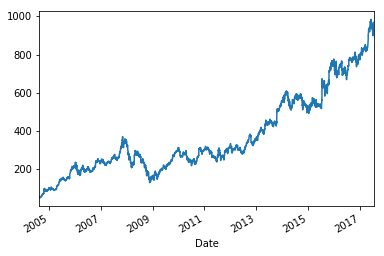

In [291]:
%matplotlib inline
goog["Adj Close"].plot()

In [292]:
df = pd.DataFrame(np.random.rand(10, 4), columns=list('abcd'))
df

,a,b,c,d
0,0.569673,0.136121,0.620094,0.110309
1,0.638885,0.370483,0.033087,0.834317
2,0.957879,0.113554,0.588956,0.381094
3,0.121533,0.432455,0.030515,0.260808
4,0.254214,0.002207,0.231407,0.364856
5,0.279437,0.449876,0.867246,0.349242
6,0.014824,0.131416,0.245982,0.707931
7,0.940392,0.609392,0.271149,0.613117
8,0.890802,0.651304,0.621210,0.961436
9,0.992455,0.243401,0.257708,0.448345


In [294]:
df.to_csv("data/may-21.csv", sep="\t")

## 作业

- 构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。

- 然后把这三个Series合并成一个DataFrame。

- 请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图

- data文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存货情况。请把这个文件读入成一个pandas dataframe

- 把每一列中的sex，sex为male的都改成1，sex为female的改成0

- 把Cabin中的NaN都填充成0 (使用fillna方法)

- 现在我们想把乘客按照年龄做一个分类，年龄在0-11岁的为0类，12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类，请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄

我们前面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。